**Course**: Data Visualization (Prof. Dr. Heike Leitte, Luisa Vollmer, RPTU Kaiserslautern),   **Name**: Faris Abu Ali,   **Date**: 23.12.2024

<div class="alert alert-info">

    
# Assignment 3 - Exploratory data analysis of the Titanic dataset
</div>

> The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

![](NYT_titanic.png)

source: [wikipedia.org](https://en.wikipedia.org/wiki/RMS_Titanic)


### Outline and goals

In the third assignment, we will explore the titanic dataset using exploratory data analysis. The goals of this exercise are:
- conduct exploratory data analysis using python's seaborn library
- make a structured analysis (of a subset) of a given dataset
- contrast subgroups of data
- find patterns and outliers in data

<div class="alert alert-danger">

**Important**: While no points will be awarded for typing the correct answers in the notebooks, it is highly advised to solve the tasks thoroughly. They are designed to be encouraging and provide you with valuable learnings for the exam, understanding of the methods and practical coding.
</div>

<div class="alert alert-success">
    
All tasks in this notebook are marked in green.
</div>

<div class="alert alert-info">
    
## 1. Load the data
</div>

In [ ]:
# !pip install seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic") # returns pandas.DataFrame
titanic.head()

# rename titanic["survived"] column values to "Died" and "Survived".
# I needed this to render the column labels as "Died" and "Survived" instead of 0 and 1.
survival_label = {0: "Died", 1: "Survived"}
titanic["survived"] = titanic["survived"].map(survival_label)

titanic[titanic['age'].isnull()].count()
# titanic['age'].isnull().sum()

,0
survived,177
pclass,177
sex,177
age,0
sibsp,177
parch,177
fare,177
embarked,177
class,177
who,177


### Description of the titanic dataset:
survived - Survival (0 = No; 1 = Yes)<br>
plass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
sex - Gender<br>
age - Age<br>
sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
fare - Passenger fare<br>
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
class - Class as string<br>
who - Type of person (child, man, woman)<br>
adult_male - Passenger is an adult male<br>
deck - Deck of passenger's accomodation<br>
embark_town - Port of Embarkation as string<br>
alive - Boolean<br>
alone - Person travelled alone<br>

<div class="alert alert-info">
    
## 2. Get an overview
</div>

The command [`pandas.DataFrame.dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns the data types as inferred by pandas.

<div class="alert alert-success">
    
Check if the inferred types match with the ones you would have assigned to each column.
</div>

In [ ]:
titanic.dtypes

,0
survived,object
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


The command [`pandas.DataFrame.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) provides summary statistics for all attributes.

In [ ]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,2,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,Died,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,549,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,NaN,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ME: I found this trick to query rows with missing column values.
e.g. to query rows whose 'embarked' column value is missing:


```py
missing_embarked = titanic[titanic['embarked'].isna()]
missing_embarked.head()
```

<div class="alert alert-success">

    
Which columns contain missing values, commonly NaN? Hint: Consider the 'count' row of `describe`.
</div>

- `age`: Since the count is 714, this implies that there are 177 rows (891 - 714) with missing age. </br>
- `embarked`: There are 2 rows (891 - 889) with missing values. <br/>
- `deck`: There are 688 rows with missing values. (To double check this, I visited the Github [titanic.csv](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv) link and found that most rows have blank `deck` value)<br/>

<div class="alert alert-success">

What are the names of the different decks and how many people were assigned to each deck? Does every passenger have an assigned deck?
</div>

Hint: The method [`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) may be helpful.

In [ ]:
# 1. What are the names of the different decks?
deck_values = titanic["deck"].unique()
print(deck_values) # [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F'] ordered by appearance in the dataset

print("-------------------")

# 2. How many passengers are in each deck?
deck_counts = titanic["deck"].value_counts(dropna=False) # Include NaN values
print(deck_counts)

print("-------------------")

# 3. Does every passenger have a deck?
missing_deck_count = titanic["deck"].isna().sum() # .isnull() also returns the same result
print(f"Number of passengers without an assigned deck: {missing_deck_count}")

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
-------------------
deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64
-------------------
Number of passengers without an assigned deck: 688


<div class="alert alert-info">
    
## 3. Analyze variables individually
</div>

First we look into some of the variables individually. We will not cover the entire dataset in detail which would exceed the scope of an assignment, but concentrate on some aspects of it.

**Hints**:
- [documentation of countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
- [list of seaborn plots](https://seaborn.pydata.org/api.html#relational-api)
- [Seaborn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

**Examples**:

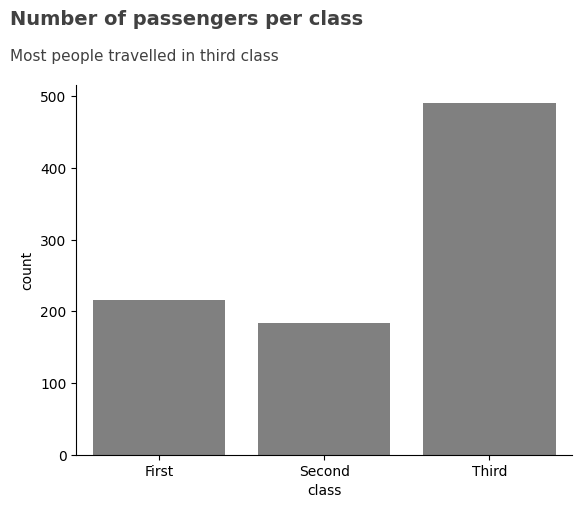

In [ ]:
ax = sns.countplot(x="class", data=titanic, color="gray")
ax.text(x=-.9, y=600, s="Number of passengers per class", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-.9, y=550, s="Most people travelled in third class", fontsize=11, fontweight='normal', color='#414141')
sns.despine() # Remove the top and right spines from plot(s).

<div class="alert alert-success">
    
Finish the histogram below.
- Set an appropriate number of bins and add a subtitle that tells about one finding.
- Can you detect different price groups?
</div>

In [ ]:
# np.arange(-2.5,600,1)

titanic["fare"].min() # 0.0
titanic["fare"].max() # 512.3292

titanic["fare"].nunique() # 248 unique values

248

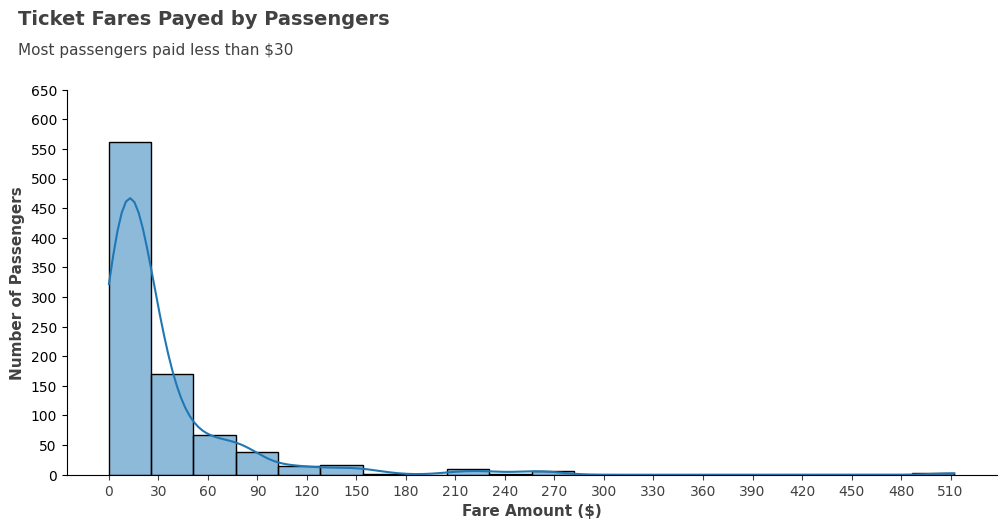

In [ ]:
fig, ax = plt.subplots(figsize=(12,5)) # matplotlib.pyplot.subplots() returns a tuple containing a figure and axes object(s)
# It is just used here to set the size of the plot. No more, no less.

ax = sns.histplot(data=titanic["fare"], bins=20, stat="count", kde=True)

ax.text(x=-55, y=760, s="Ticket Fares Payed by Passengers", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-55, y=710, s="Most passengers paid less than $30", fontsize=11, fontweight='normal', color='#414141')

ax.set_xlabel("Fare Amount ($)", fontsize=11, fontweight='bold', color="#414141")
ax.set_ylabel("Number of Passengers", fontsize=11, fontweight='bold', color="#414141")

# Adjust tick parameters for better readability
ax.tick_params(axis='x', labelsize=10, colors='#414141')

ax.set_xticks(np.arange(0, titanic["fare"].max() + 10, 30))
ax.set_yticks(np.arange(0, 700, step=50))

sns.despine()

<div class="alert alert-success">
    
Select two columns/variables from the dataset and plot each with an appropriate chart (= two 1D-histograms, explore more if you want). Check that chart parameters are set appropriately. Add a matching title to your charts and state one finding in the subtitle.
</div>

In [ ]:
list(titanic)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

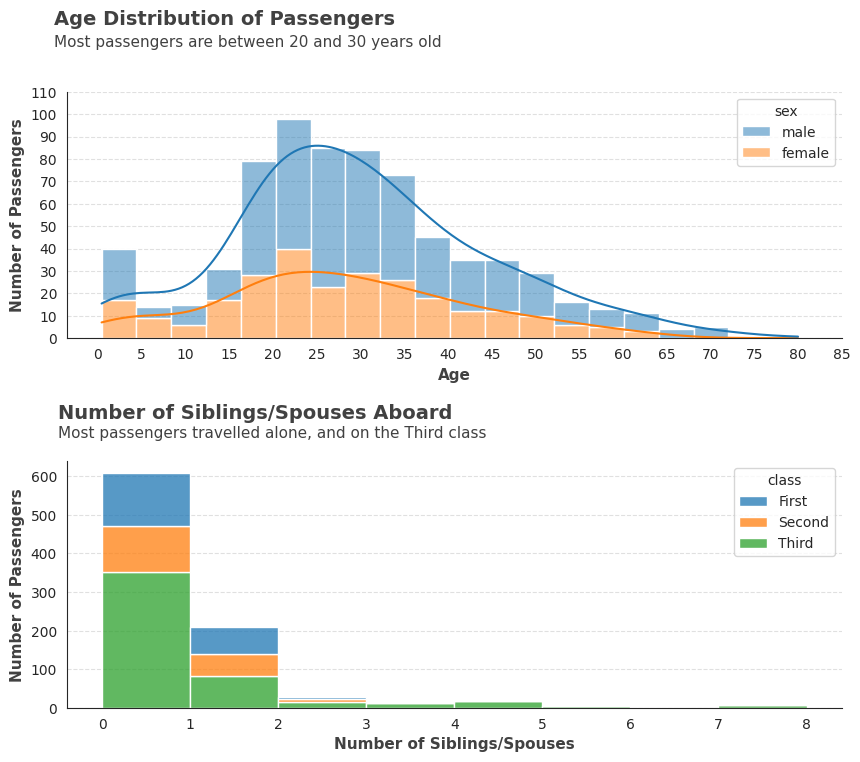

In [ ]:
sns.set_style("white")

# Let's plot the age distribution of passengers as a histogram
fig, axes= plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Add padding between the two plots
# plt.tight_layout()

# Add padding between the two plots
plt.subplots_adjust(hspace=0.5)  # Increase vertical space (hspace)

# ------------------- Plot the 'age' column (first subplot) -------------------
ax = sns.histplot(data=titanic, x="age", hue="sex", bins=20, stat="count", kde=True, multiple="stack", ax=axes[0])
# - I added the "kde" (Kernel Density Estimation) parameter to show the kernel density estimation of the data. It is a smoothed version of the histogram.

# - ax=axes[0] is used to plot the histogram in the first subplot of the matplotlib figure.

# - After reading the documentation, I liked the "multiple" parameter. It allows to stack the histograms of different categories.
# So I decided to include the "sex" column represented by the hue channel.

axes[0].text(x=-5, y=140, s="Age Distribution of Passengers", fontsize=14, fontweight='semibold', color='#414141')
axes[0].text(x=-5, y=130, s="Most passengers are between 20 and 30 years old", fontsize=11, fontweight='normal', color='#414141')

axes[0].set_xlabel("Age", fontsize=11, fontweight='bold', color="#414141")
axes[0].set_ylabel("Number of Passengers", fontsize=11, fontweight='bold', color="#414141")

axes[0].set_xticks(np.arange(0, titanic["age"].max() + 10, step=5))
axes[0].set_yticks(np.arange(0, 120, step=10)) # this 120 is the max value of the frequency of the histogram, not the age.

# Set grid lines
axes[0].grid(axis='y', linestyle='--', alpha=0.6) # I like this for better readability


# -------------------  Plot the 'embark_town' column (second subplot) -------------------
axes[1] = sns.histplot(data=titanic, x="sibsp", hue="class", bins=8, stat="count", multiple="stack", ax=axes[1])

axes[1].text(x=-0.5, y=750, s="Number of Siblings/Spouses Aboard", fontsize=14, fontweight='semibold', color='#414141')
axes[1].text(x=-0.5, y=700, s="Most passengers travelled alone, and on the Third class", fontsize=11, fontweight='normal', color='#414141')

axes[1].set_xlabel("Number of Siblings/Spouses", fontsize=11, fontweight='bold', color="#414141")
axes[1].set_ylabel("Number of Passengers", fontsize=11, fontweight='bold', color="#414141")

axes[1].set_yticks(np.arange(0, 700, step=100))


# Set grid lines
axes[1].grid(axis='y', linestyle='--', alpha=0.6) # I like this for better readability


sns.despine()

<div class="alert alert-info">
    
## 4. Who did survive?
</div>

For each question below, create a chart in the axes above that helps you answer the questions. It is ok to stick to the [plots implemented in seaborn](https://seaborn.pydata.org/api.html). Some plots, like stacked bar charts, require more work.

<div class="alert alert-success">
    
Who had the highest chance of survival: men, women, or children? Hint: You can add another dimension to your `displot` or `countplot` by coloring bars with 'hue=column_name'.
</div>

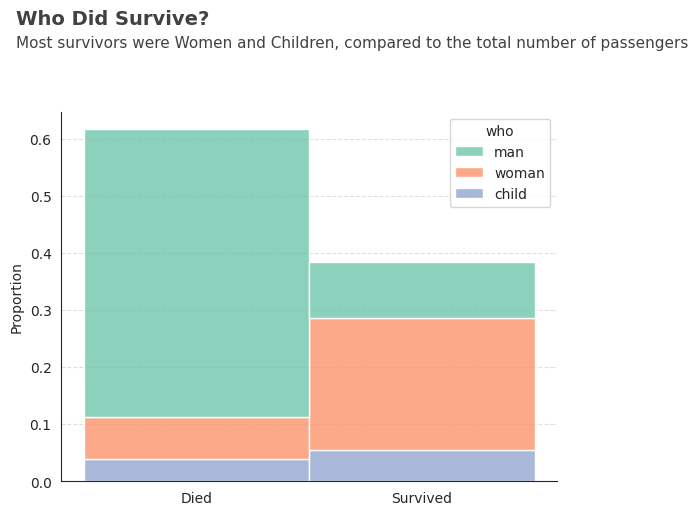

In [ ]:
# ----------------- histplot() -----------------
ax = sns.histplot(data=titanic, x="survived", hue="who", multiple="stack", palette="Set2", stat="proportion")
ax.set_xticks(ticks=[0, 1], labels=["Died", "Survived"])
ax.set_xlabel(None)
# ax.set_title("Survival Proportions by Category", fontsize=14, fontweight='semibold')
ax.set_ylabel("Proportion")


# Add a title and adjust the position of the title
ax.text(x=-0.8, y=0.8, s="Who Did Survive?", fontsize=14, fontweight='semibold', color='#414141')

# Add a subtitle and adjust the position of the subtitle
ax.text(x=-0.8, y=0.76, s="Most survivors were Women and Children, compared to the total number of passengers", fontsize=11, fontweight='normal', color='#414141')

# Set grid lines
ax.grid(axis='y', linestyle='--', alpha=0.6) # I like this for better readability

sns.despine()
plt.show()

<div class="alert alert-success">
    
Did age have an influence? Compare the age of people who survived and those who did not. Is your observation consistent for all three types of people (men, women, children)?
</div>

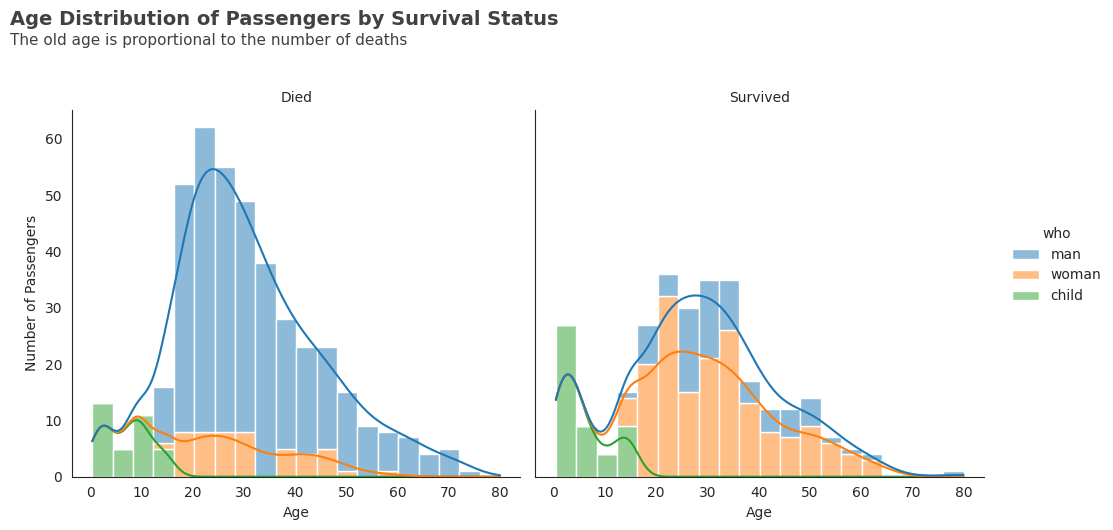

In [ ]:
g = sns.displot(data=titanic, x="age", hue="who", col="survived", multiple="stack", kde=True)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Age", "Number of Passengers")

# Add captions to the plots
g.figure.text(x=0, y=1.02, s="Age Distribution of Passengers by Survival Status", fontsize=14, fontweight='semibold', color='#414141')
g.figure.text(x=0, y=0.98, s="The old age is proportional to the number of deaths", fontsize=11, fontweight='normal', color='#414141')
# add space between the title and the plot
g.figure.subplots_adjust(top=0.85)

**Did people on all decks have the same survival rate?**

The probabilities of survival and death can be computed as follows. We count the total number of people in each group ([`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) and divide by the total number of passengers:

In [ ]:
titanic['alive'].value_counts() / len(titanic)

,count
alive,
no,0.616162
yes,0.383838


We see that the total survival rate was 38%.

To do the same for each deck, we first to handle NaN-values in the deck entries. We add a new column, that has a categorical entry "None" for all passengers with an unspecified deck entry:

In [ ]:
titanic['deck_all'] = titanic['deck'].cat.add_categories("None").fillna("None")

print(titanic['deck_all'].value_counts())

deck_all
None    688
C        59
B        47
D        33
E        32
A        15
F        13
G         4
Name: count, dtype: int64


<div class="alert alert-success">
    
Now compute the survival rates per deck and plot the resulting series using, for example, [`seaborn.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html).

</div>

Hints:
- Pandas allows you to filter data. `titanic[ titanic['age'] > 10 ]` returns a series of all passengers that are older than 10 years. This can be used to filter only people that survived.
- You can divide a series by a series elementwise. `titanic['fare'] / titanic['age']` computes for each passanger the fraction fare divided by age (i.e. ticket price per year they lived - which is nonesense, but computable).

In [ ]:
# Calculate the number of survivors and total passengers per deck
survivors_per_deck = titanic[titanic['alive'] == 'yes'].groupby('deck_all', observed=False)['alive'].count()
# This produces a vector/series with the number of survivors per deck. If a deck has no survivors.

total_per_deck = titanic.groupby('deck_all', observed=False)['alive'].count()
# This produces a vector/series with the total number of passengers per deck. If a deck has no passengers, it will not be included in the vector.

# Compute survival rate per deck (Simply dividing two vectors/series element-wise)
survival_rate_per_deck = (survivors_per_deck / total_per_deck).fillna(0)

# Print the survival rate per deck
print(survival_rate_per_deck)


deck_all
A       0.466667
B       0.744681
C       0.593220
D       0.757576
E       0.750000
F       0.615385
G       0.500000
None    0.299419
Name: alive, dtype: float64


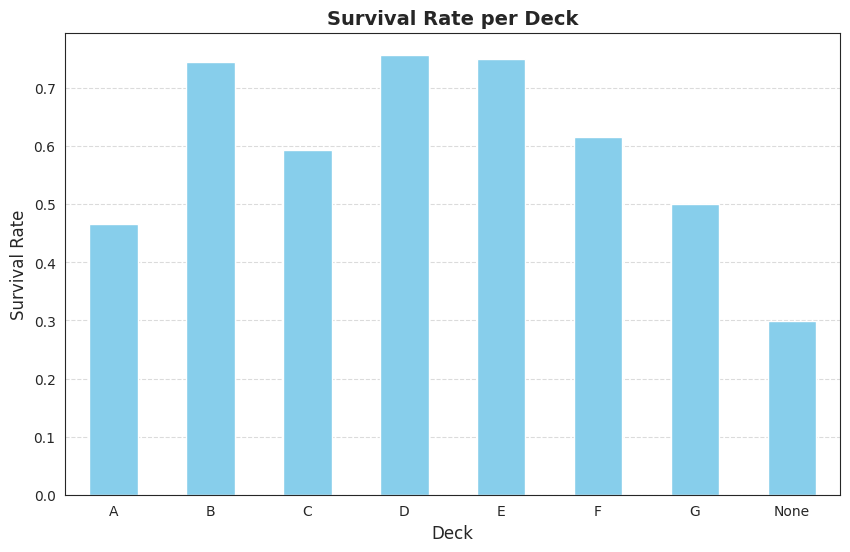

In [ ]:
# Plot survival rate per deck
survival_rate_per_deck.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Survival Rate per Deck', fontsize=14, fontweight='bold')
plt.xlabel('Deck', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<div class="alert alert-info">
    
## 4. Fake news?
</div>

You talk to a friend about the titanic dataset and he/she says:
> It's so unfair. Only elderly people could afford First Class tickets and have a good trip on the Titanic.

<div class="alert alert-success">
    
Briefly discuss this statement. Write approximately 10-15 lines.
</div>

Hint:
- Explanation of **Discuss**: Essentially this is a written debate where you are using your skill at reasoning, backed up by carefully selected evidence to make a case for and against an argument, or point out the advantages and disadvantages of a given context. Remember to arrive at a conclusion. source (not necessary to read): [Essay terms explained by University of Leicester](https://www2.le.ac.uk/projects/oer/oers/ssds/oers/writing-skills/writingskillscg.pdf)


### Answer:
- In the first plot below 'First Class Passengers by Age', I have filtered the titanic dataset to include only passengers who were on the first class. The plot clearly follows a Gaussian/Normal distribution where the mean (and the mode) is in the middle.

- This means that most first-class passengers were actually middle-aged people (let's say between 30 to 50 years old).

- Moving to the next plot on the right 'Passengers by Age and Class', we can notice that most elderly passengers were on the first-class, compared to the set of elderly people themselves. This statement is true; but if we reverse the sentence and say: "Most first-class passengers were elderly", this turns into a false statement; because it contradicts the  distribution shown on the left plot, where the mode of the distribution was between 35-40.

- To wrap it up:
    - ❌ Only elderly passengers could afford First Class tickets.
    - ❌ Most First Class passengers were elderly.
    - ✅ Most elderly passengers were on the first-class.
### Supporting charts:

Text(0.5, 1.0, 'Passengers by Age and Class')

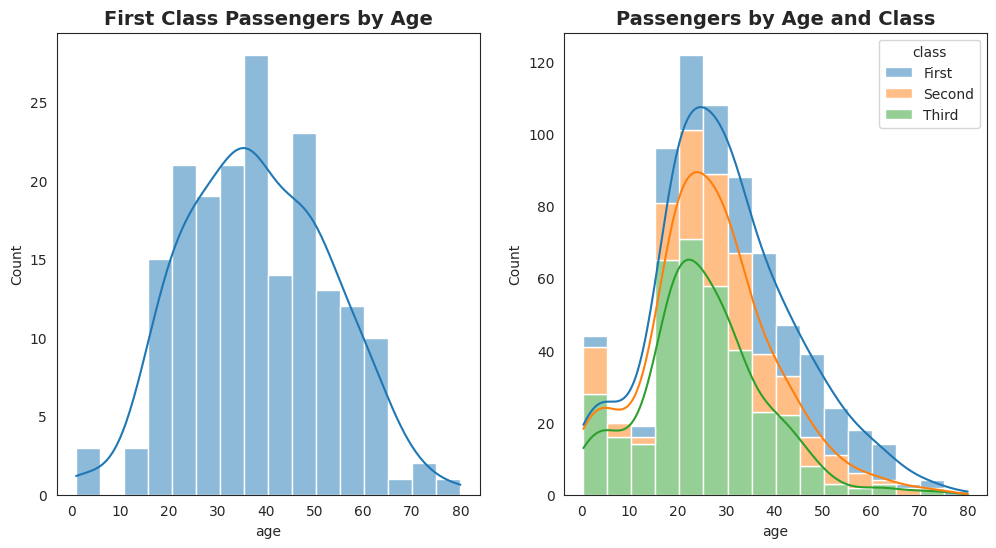

In [ ]:
# suggestions: countplot, displot, histplot, scatterplot, boxplot, jointplot

fig, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

first_class = titanic[titanic['class'] == 'First']
axes[0] = sns.histplot(data=first_class, x='age', binwidth=5, kde=True, ax=axes[0])
axes[0].set_title('First Class Passengers by Age', fontsize=14, fontweight='bold')

# elderly = titanic[titanic['age'] >= 60]
axes[1] = sns.histplot(data=titanic, x='age', hue='class', ax=axes[1], multiple='stack', binwidth=5, kde=True)
axes[1].set_title('Passengers by Age and Class', fontsize=14, fontweight='bold')